# Aniket Shelke

## Cardiovascular Risk Prediction Project

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [3]:
df.shape

(3390, 17)

In [4]:
#checking last 5 records 
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [5]:
#id column is not needed so dropping it
df.drop('id',inplace = True,axis = 1)

In [6]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [8]:
df.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

In [9]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# #Using Pandas Profiling for better getting Insights and Better idea of the Datasets

from pandas_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#Checking missing values
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
print('Missing Data Percentage')
print(round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,3))

Missing Data Percentage
glucose            8.968
education          2.566
BPMeds             1.298
totChol            1.121
cigsPerDay         0.649
BMI                0.413
heartRate          0.029
age                0.000
sex                0.000
is_smoking         0.000
prevalentStroke    0.000
prevalentHyp       0.000
diabetes           0.000
sysBP              0.000
diaBP              0.000
TenYearCHD         0.000
dtype: float64


In [13]:
#Filling missing values with median 
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
    df[col] = df[col].fillna(df[col].median())

In [14]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Exploratory Data Analysis

In [15]:
# Checking the number of duplicate records in the data

print(f"The total number of duplicate records in the dataset : {df.duplicated().sum()}")

The total number of duplicate records in the dataset : 0


In [16]:
# Checking the number of unique values in each of the feature

pd.DataFrame({
              "Unique values" : df.nunique().sort_values().values,
              "Data type" : [df[col].dtype for col in df.nunique().sort_values().index]},
df.nunique().sort_values().index)

Unique values Data type
sex                          2    object
is_smoking                   2    object
BPMeds                       2   float64
prevalentStroke              2     int64
prevalentHyp                 2     int64
diabetes                     2     int64
TenYearCHD                   2     int64
education                    4   float64
cigsPerDay                  32   float64
age                         39     int64
heartRate                   68   float64
glucose                    132   float64
diaBP                      142   float64
sysBP                      226   float64
totChol                    240   float64
BMI                       1259   float64

In [17]:
# Lets check the discrete and continuous features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print("Categorical_features:",categorical_features)
print("Numeric Features:", numeric_features)

Categorical_features: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Numeric Features: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


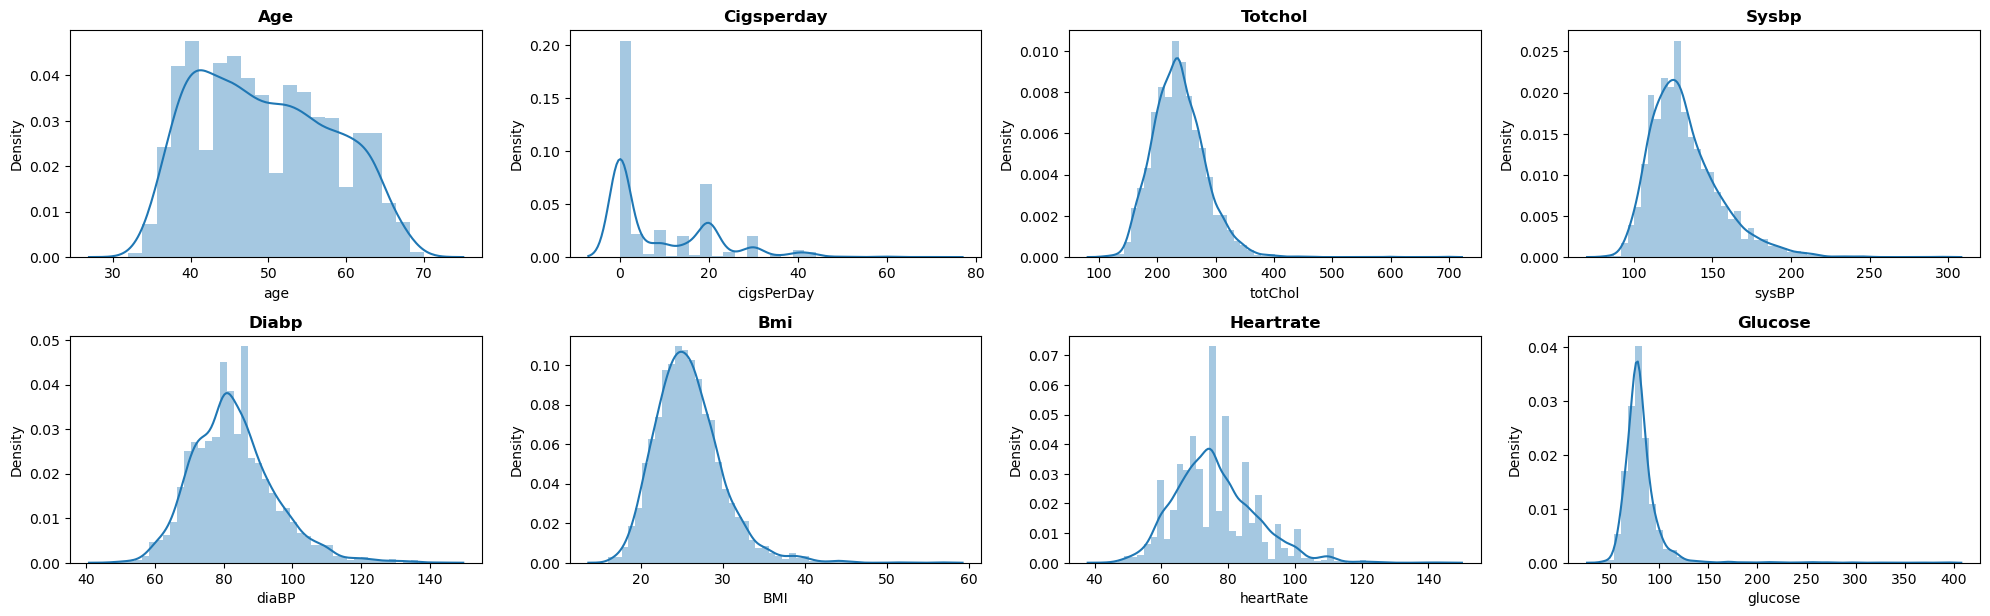

In [18]:
# Visualizing the distributions.
plt.figure(figsize=(20,15))
for n,col in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(df[col])
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

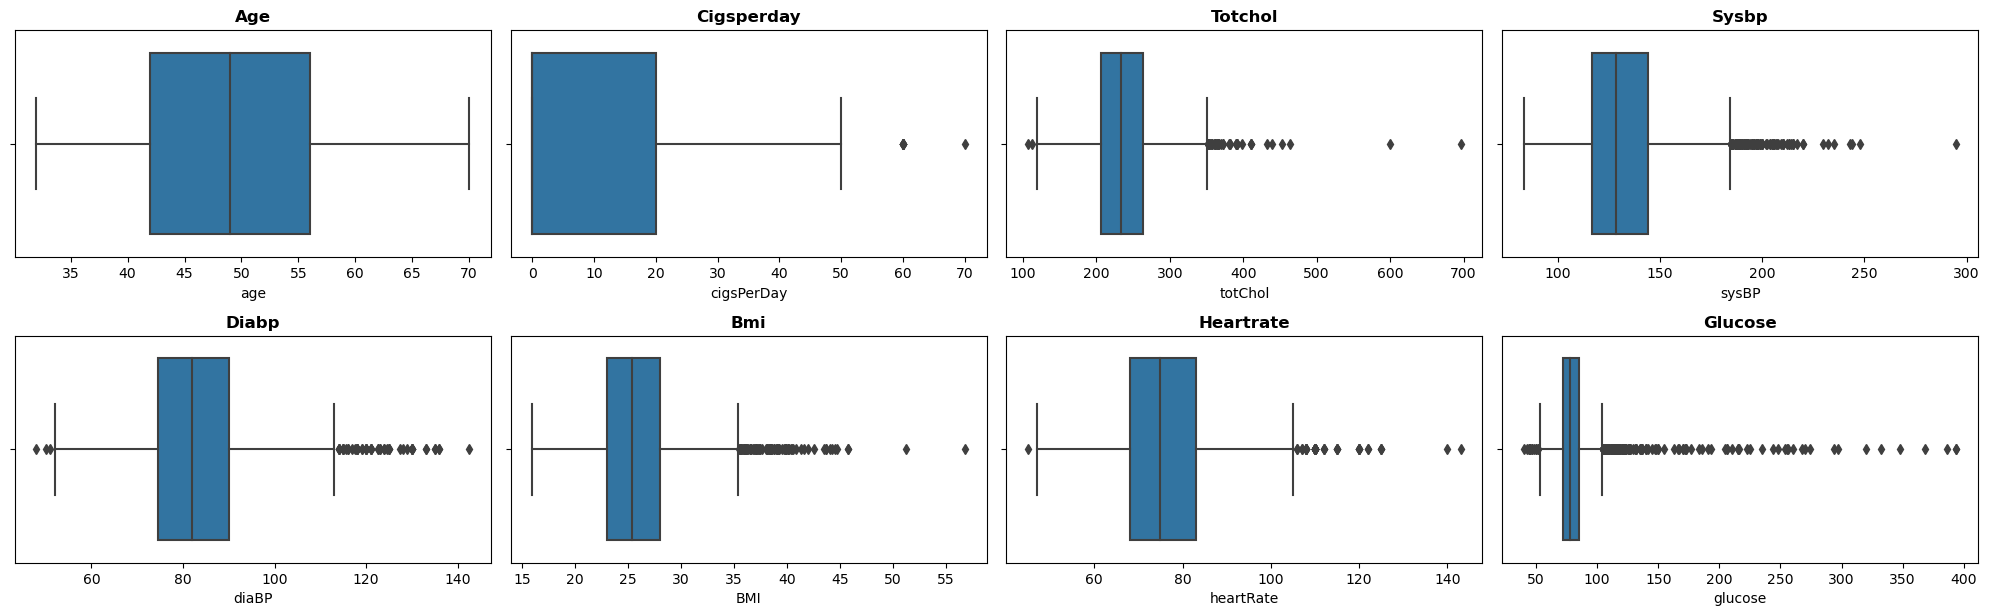

In [19]:
plt.figure(figsize=(20,15))
for n,col in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[col])
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

In [20]:
# Handling outlier part
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5*IQR
neg_outlier = Q1 - 1.5*IQR

In [21]:
print(Q1)
print("*************************************")
print(Q3)
print("*************************************")
print(IQR)
print("*************************************")
print(pos_outlier)
print("*************************************")
print(neg_outlier)
print("*************************************")

age                 42.00
education            1.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            206.00
sysBP              117.00
diaBP               74.50
BMI                 23.03
heartRate           68.00
glucose             72.00
TenYearCHD           0.00
Name: 0.25, dtype: float64
*************************************
age                 56.0000
education            3.0000
cigsPerDay          20.0000
BPMeds               0.0000
prevalentStroke      0.0000
prevalentHyp         1.0000
diabetes             0.0000
totChol            264.0000
sysBP              144.0000
diaBP               90.0000
BMI                 27.9975
heartRate           83.0000
glucose             85.0000
TenYearCHD           0.0000
Name: 0.75, dtype: float64
*************************************
age                14.0000
education           2.0000
cigsPerDay         20.0000
BPMeds              0.0000
preval

In [22]:
# Removing outliers by standard methods and Plotting graphs:
df1=df.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,df[col]))

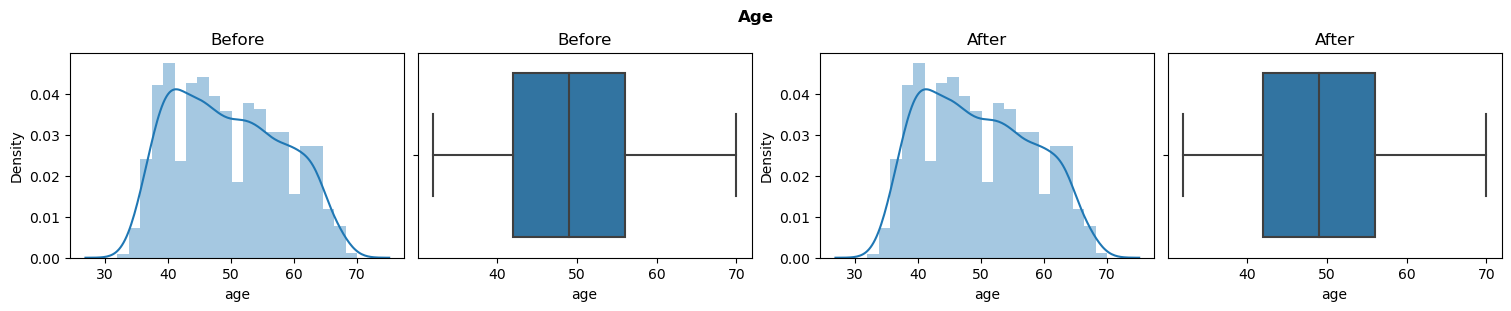

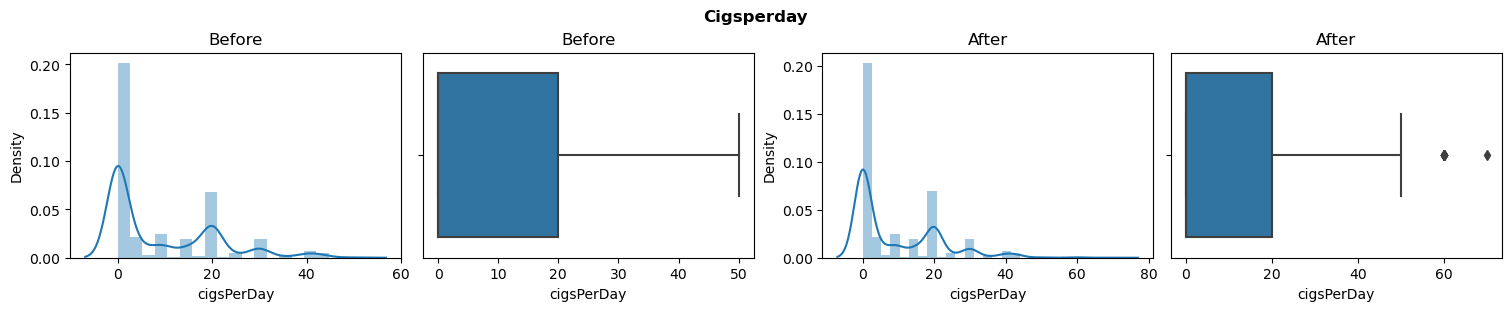

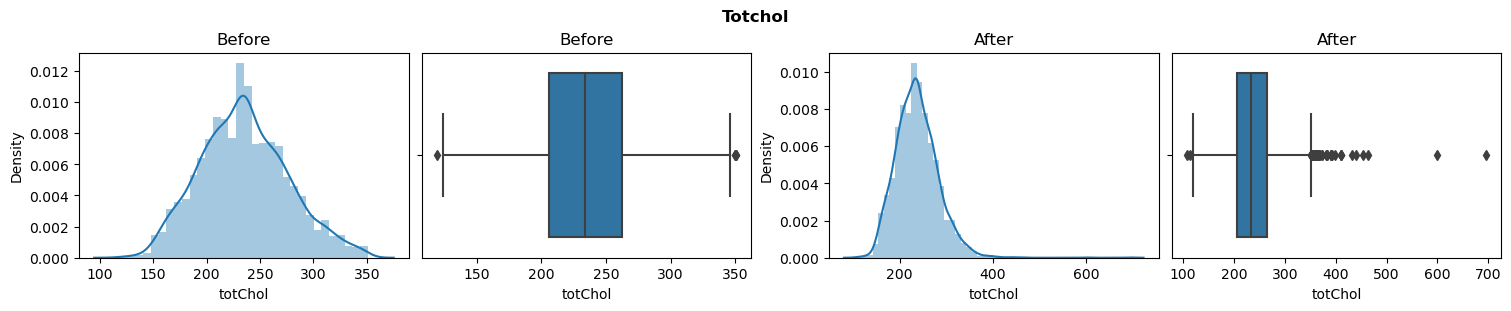

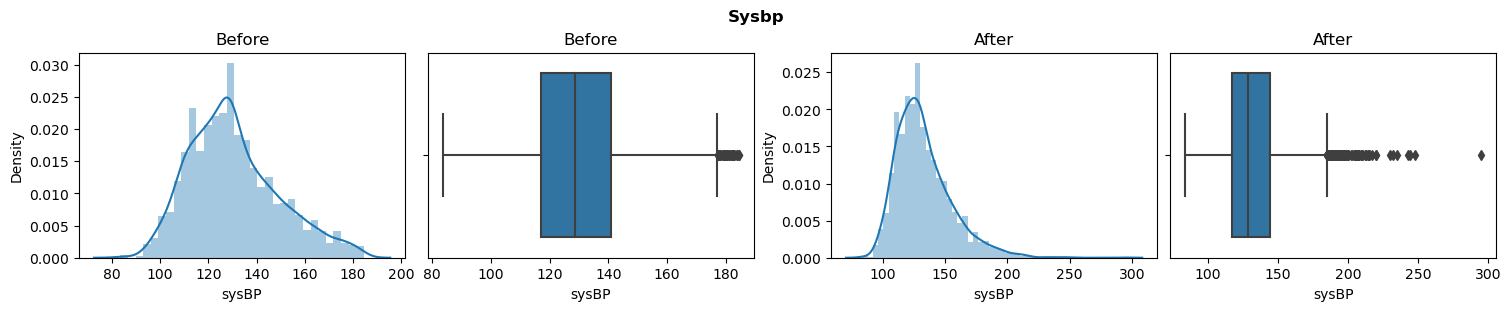

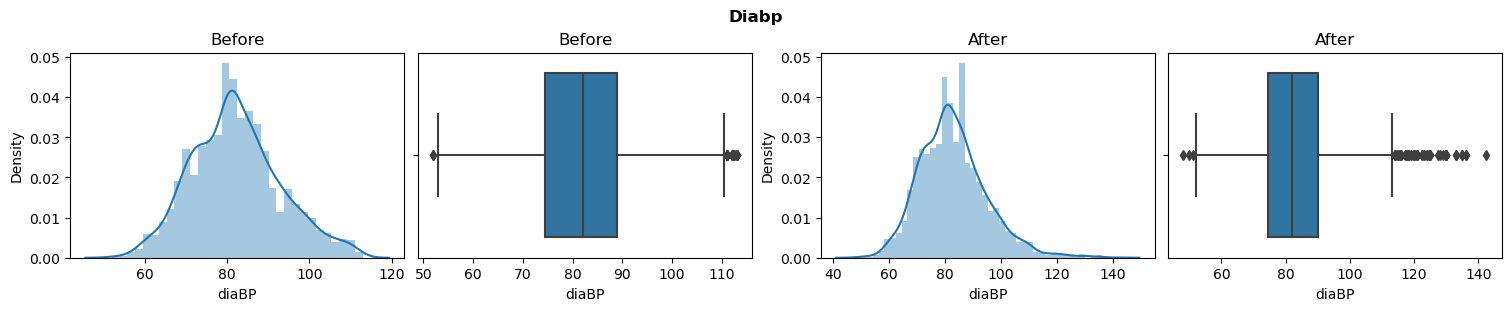

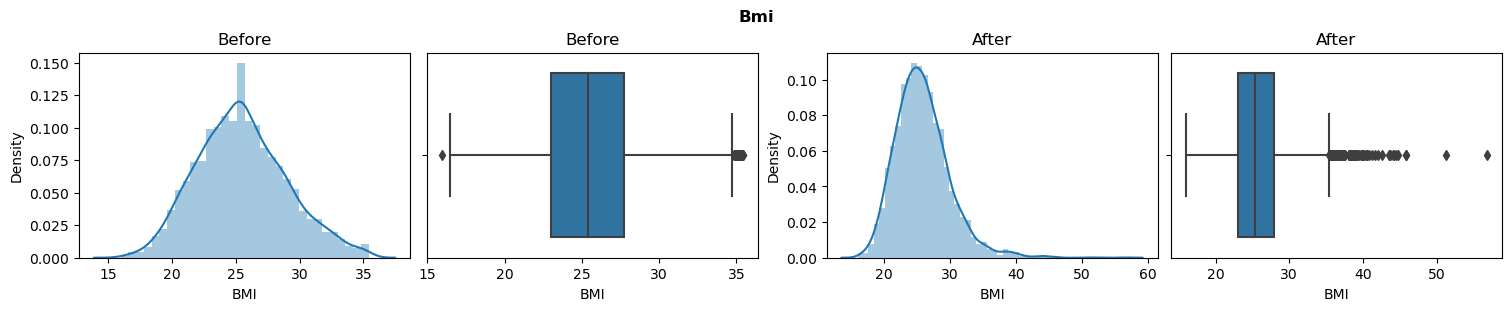

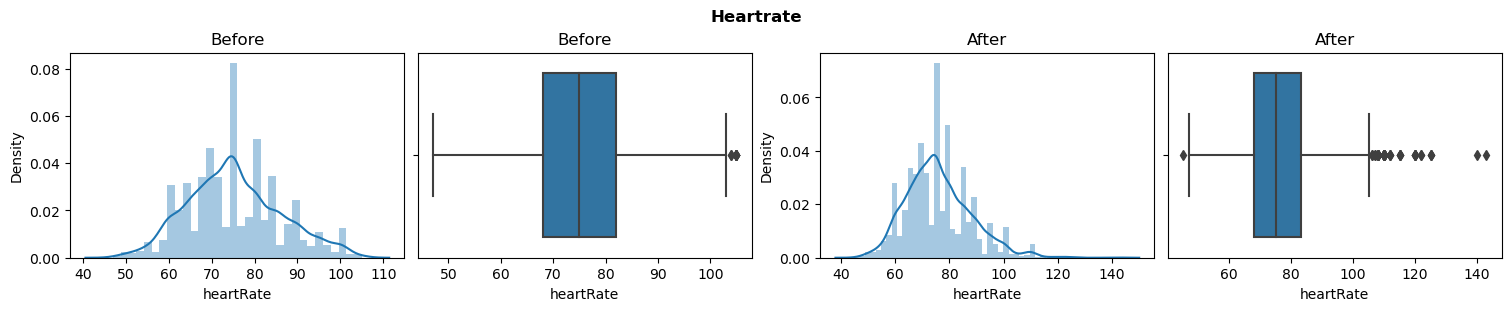

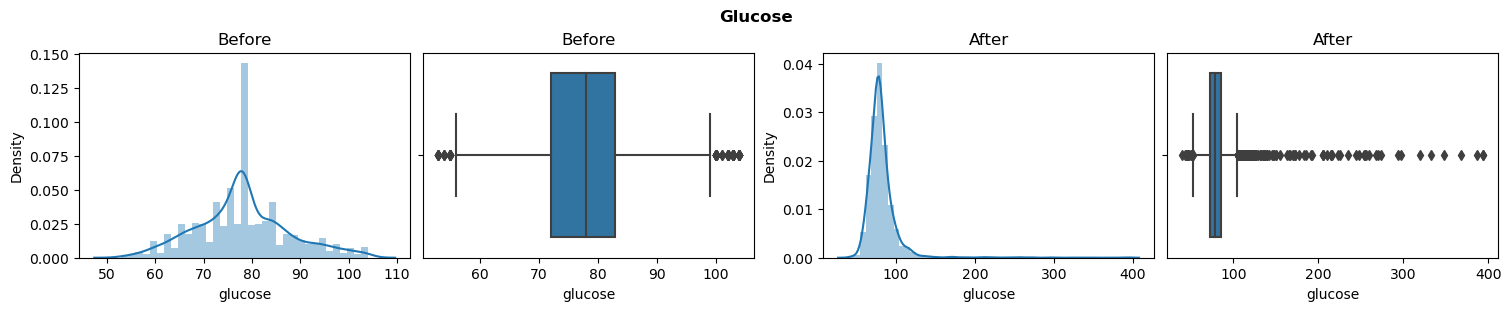

In [23]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [24]:
# Defining a label encoder based on above data
encoding= {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df1 = df1.replace(encoding)

In [25]:
# Checking Whether all features are numeric or not
len(df1.columns) == len(df1.describe().columns)

True

In [26]:
df1.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0    0           1         3.0     0.0                0   
1   36        4.0    1           0         0.0     0.0                0   
2   46        1.0    0           1        10.0     0.0                0   
3   50        1.0    1           1        20.0     0.0                0   
4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

# Univariate and Bivariate Analysis

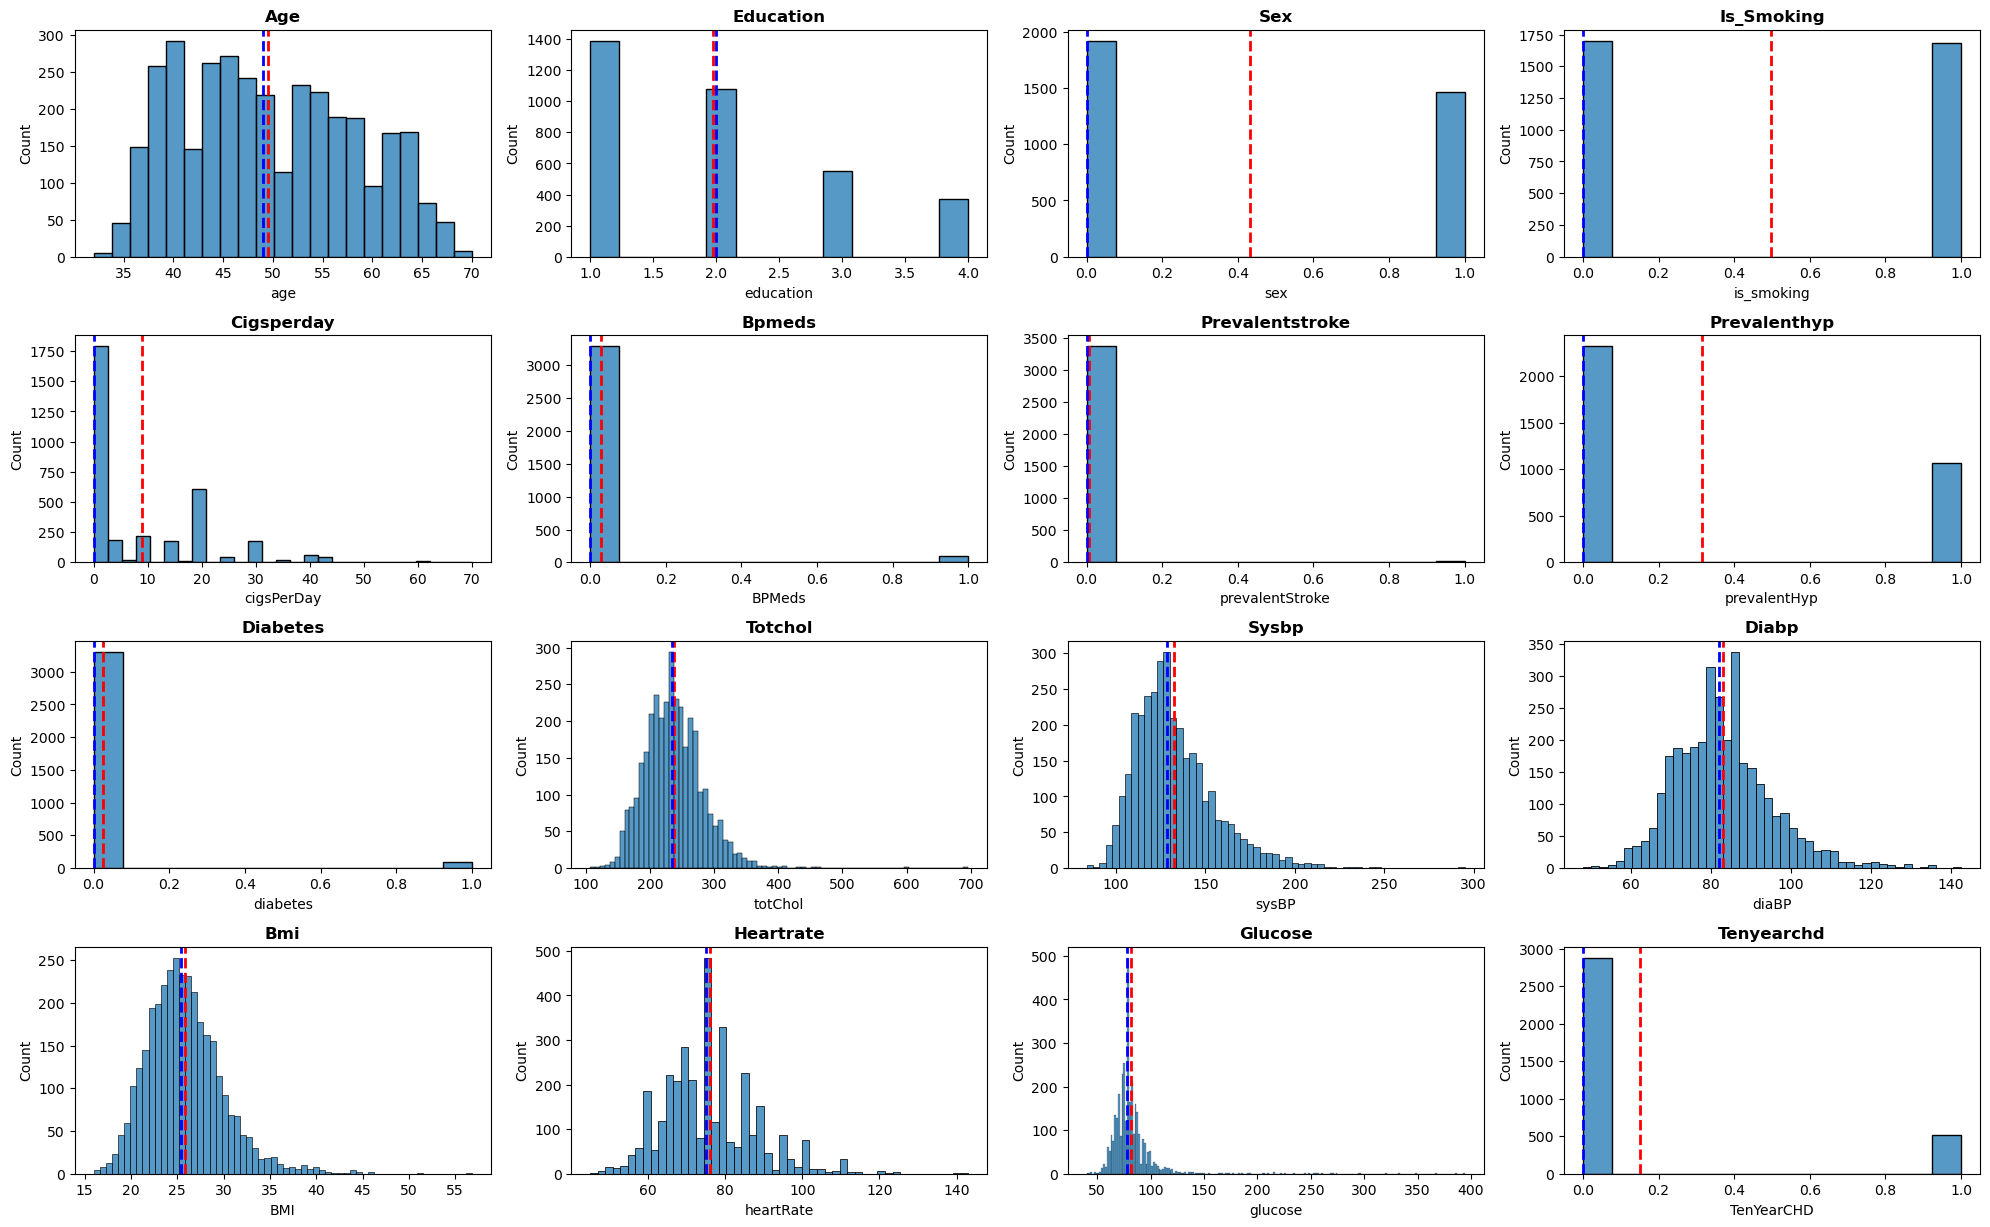

In [27]:
# Visualizing the mean and median.
plt.figure(figsize=(20,15))
for n,col in enumerate(df.columns):
  feature = df1[col]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

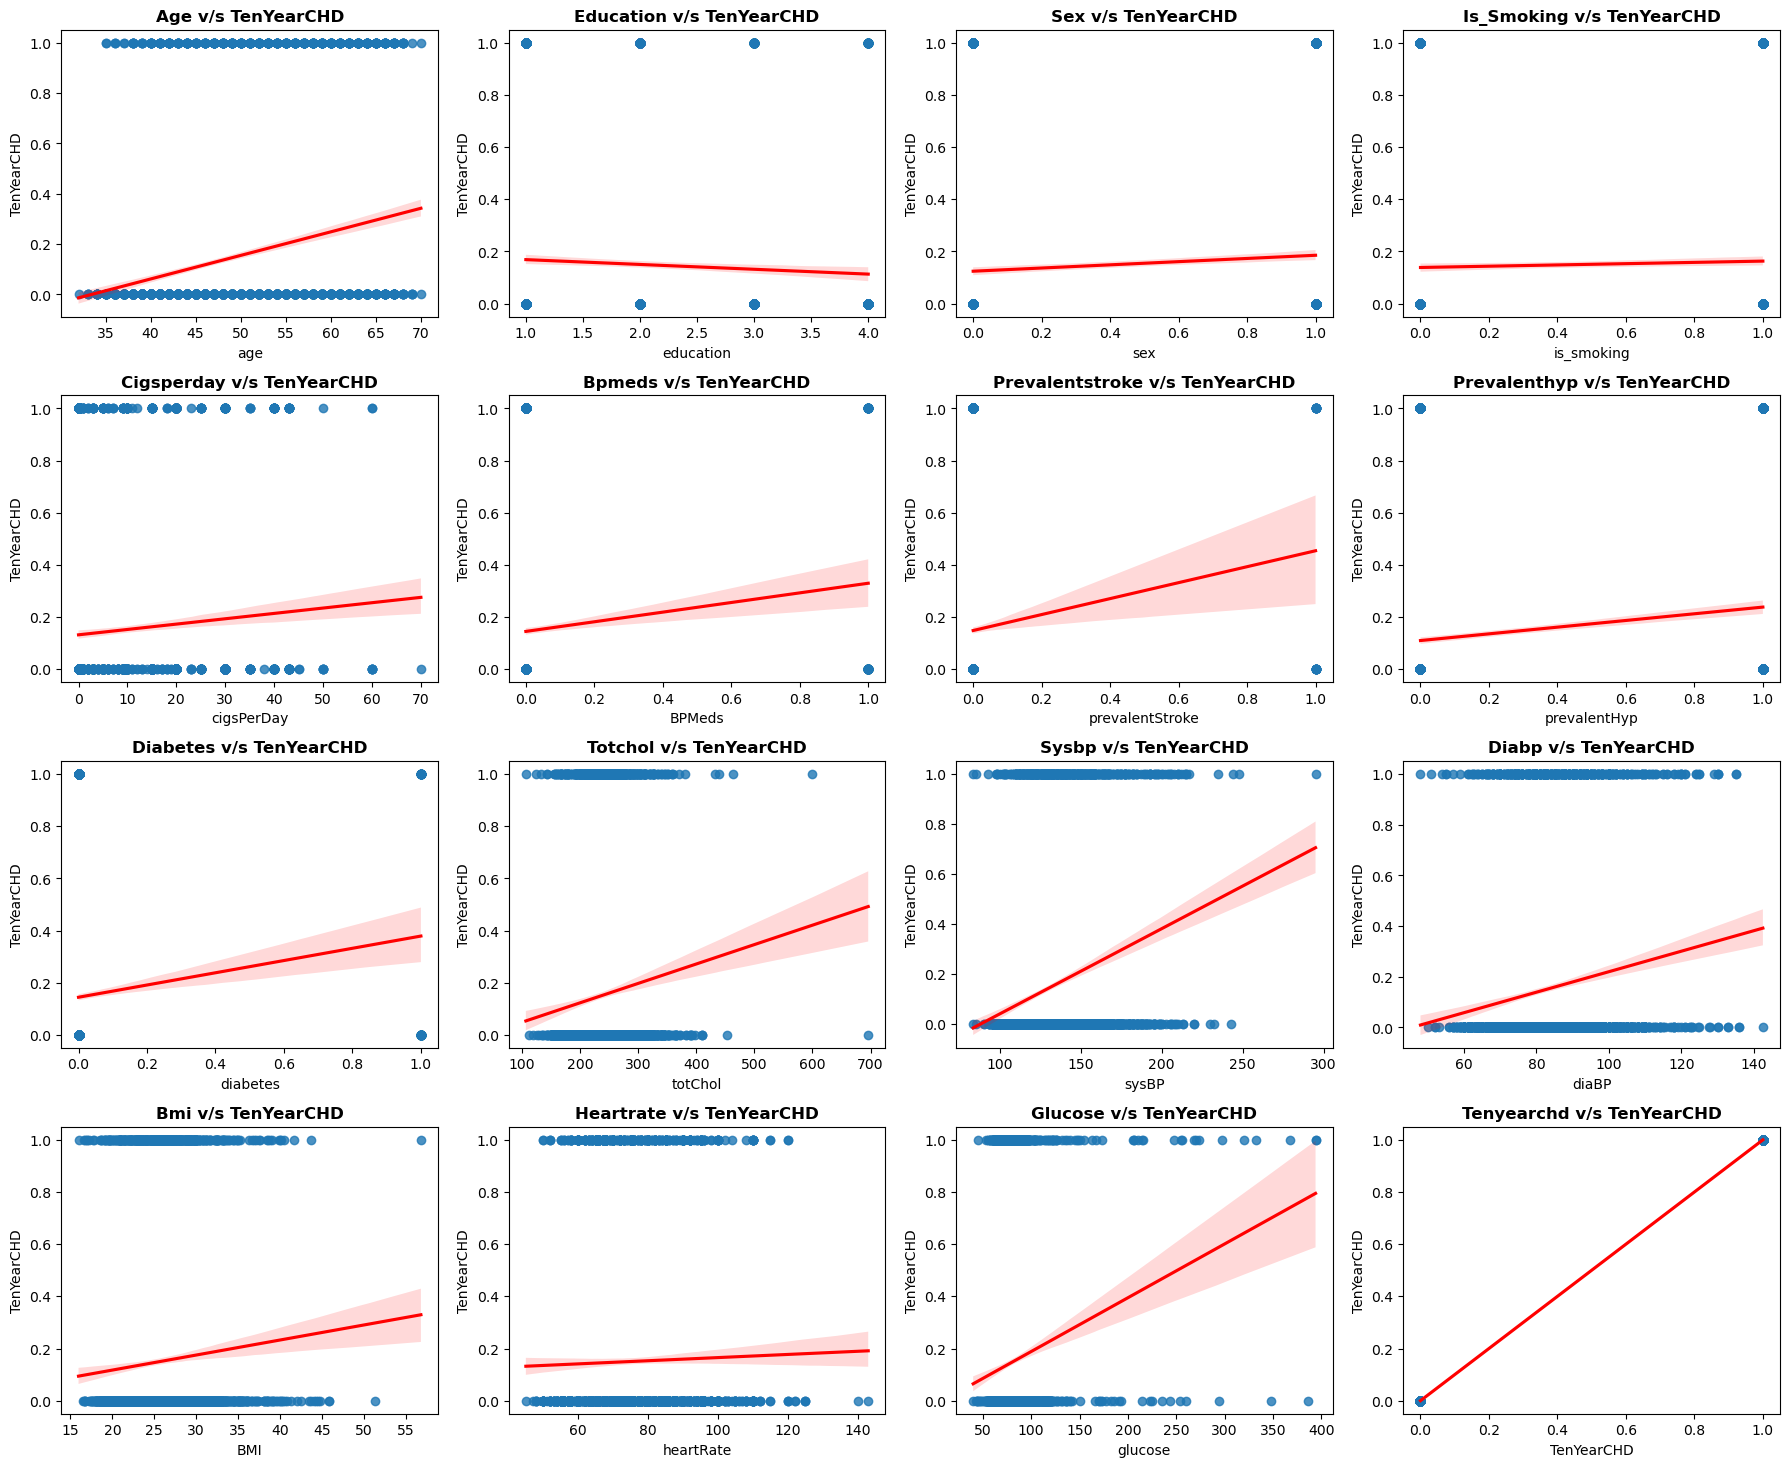

In [28]:
# Checking Linearity
ind_var = [i for i in df1.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,col in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df1[col], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{col.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

In [29]:
# Defining a function to calculate Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

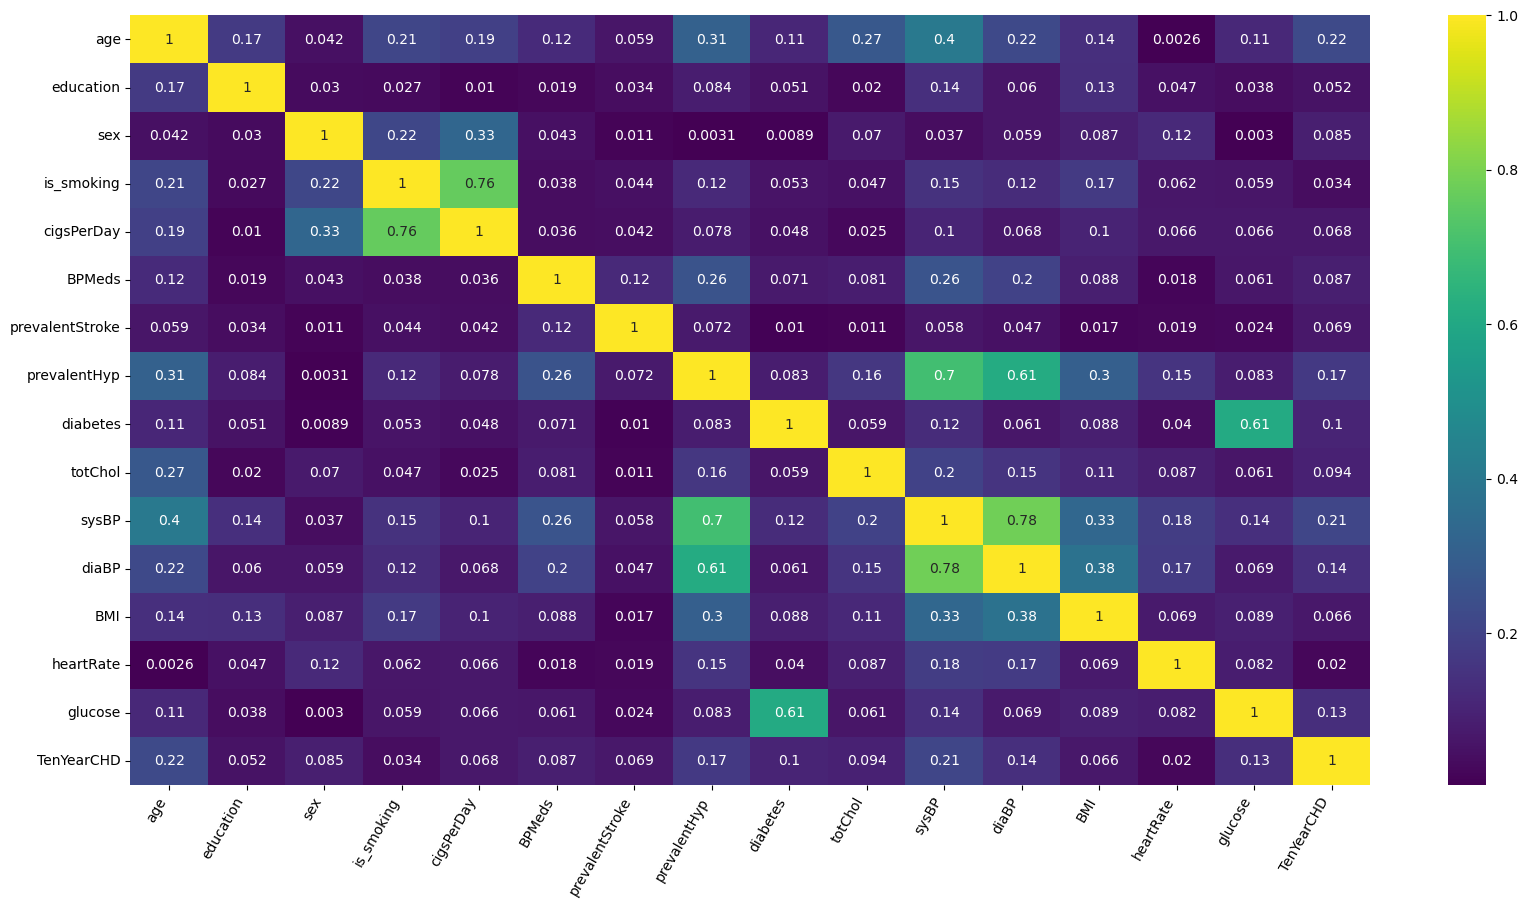

In [30]:
# Checking corelations
plt.figure(figsize=(20,10))
plot=sns.heatmap(abs(df1.corr()), annot=True, cmap='viridis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

In [31]:
# Checking VIF for each variable
independent_variables = [i for i in df1.columns if i not in ['TenYearCHD']]

calc_vif(df1[independent_variables])

variables         VIF
0             sysBP  135.092939
1             diaBP  131.558282
2               BMI   44.642973
3               age   41.218104
4         heartRate   38.777048
5           totChol   30.804073
6           glucose   20.541106
7        is_smoking    4.836168
8         education    4.762194
9        cigsPerDay    4.105001
10     prevalentHyp    2.413186
11              sex    2.123738
12         diabetes    1.583344
13           BPMeds    1.133726
14  prevalentStroke    1.027138

In [32]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df1.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(df1[independent_variables])

variables       VIF
0              age  5.504983
1        education  4.099568
2              sex  1.978754
3       cigsPerDay  1.734073
4     prevalentHyp  1.684766
5           BPMeds  1.120373
6         diabetes  1.044865
7  prevalentStroke  1.024960

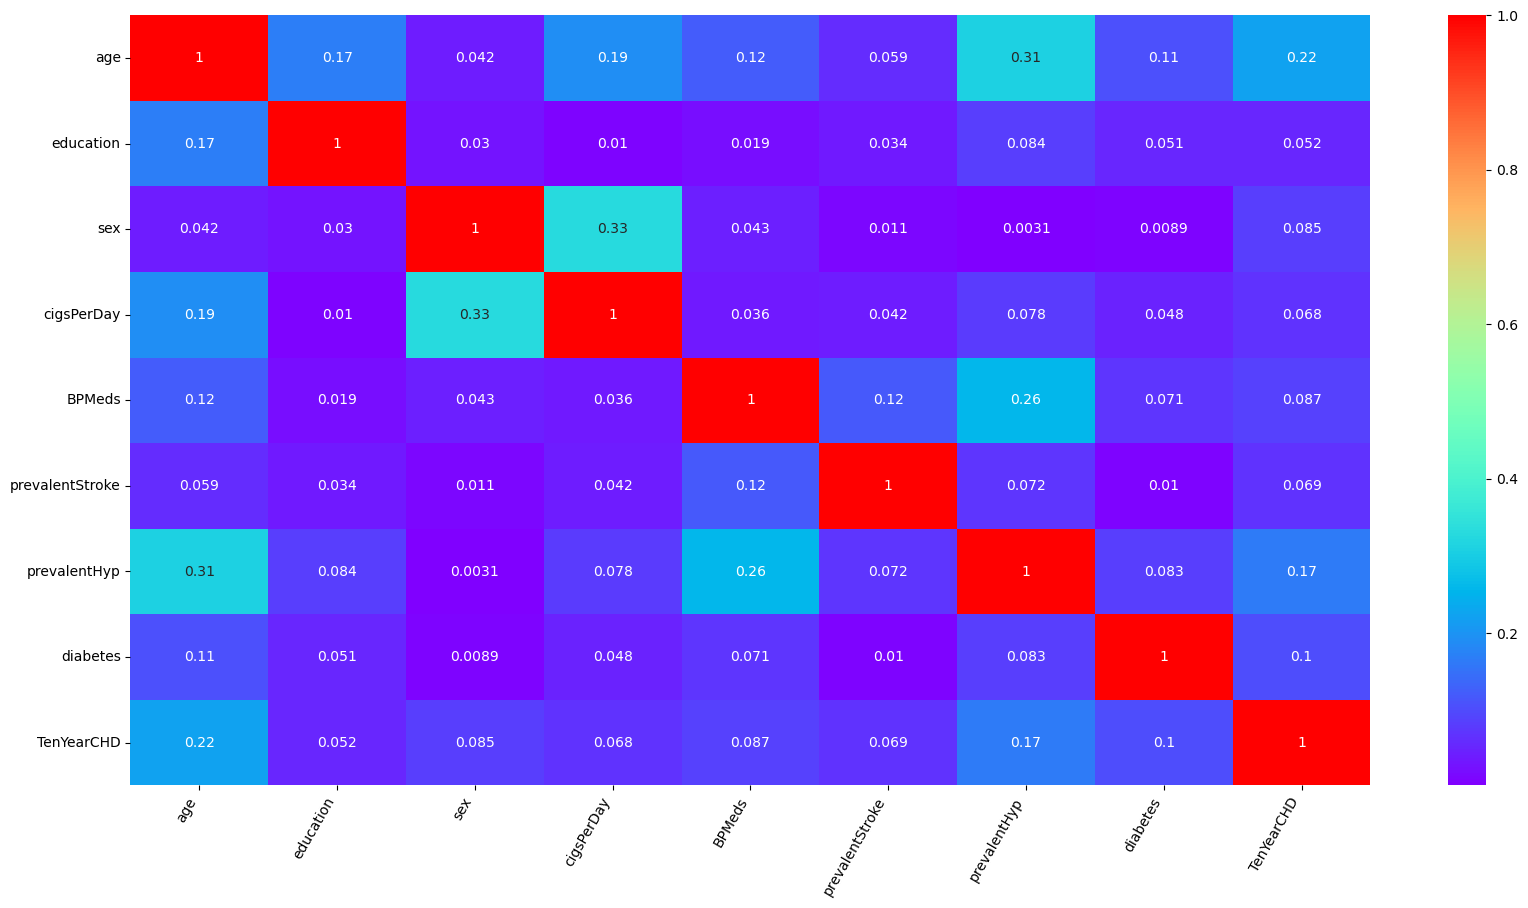

In [33]:
# Updating the dataset
dataset = df1[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(20,10))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='rainbow')
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

In [34]:
# Defining variables required
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in df1.columns if i not in ['TenYearCHD']]

# Splitting the data into train and test
x = scaler.fit_transform(df1[independent_variables])
y = df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 101)

In [35]:
# Handling class imbalance by oversampling followed by removing the Tomek link
from imblearn.combine import SMOTETomek
x_smote, y_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)


# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2295
1     417
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2196
1    2196
Name: TenYearCHD, dtype: int64 



In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [74]:
def evaluate_model(model,x_train,x_test,y_train,y_test):

   # Fitting the model
  model.fit(x_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()
    
  return model

# Logistic Regression

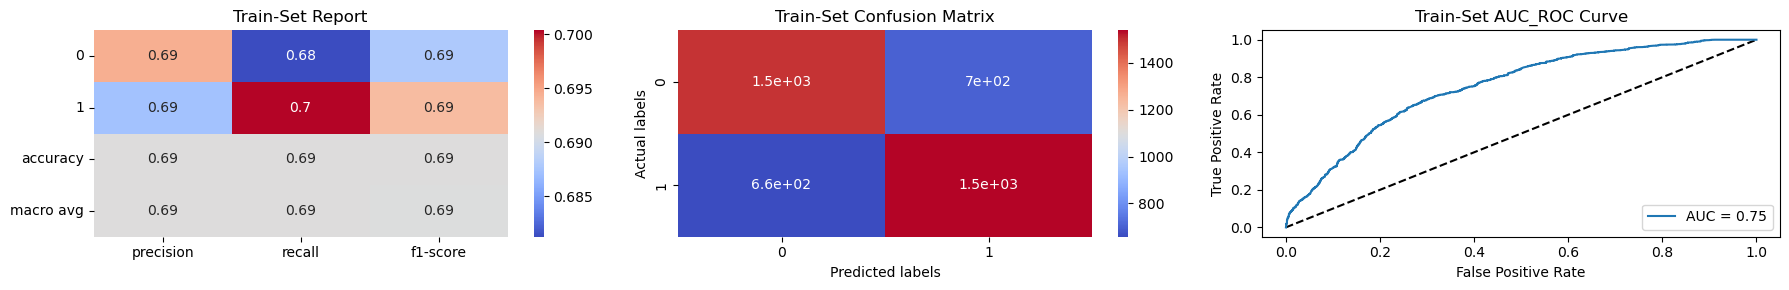

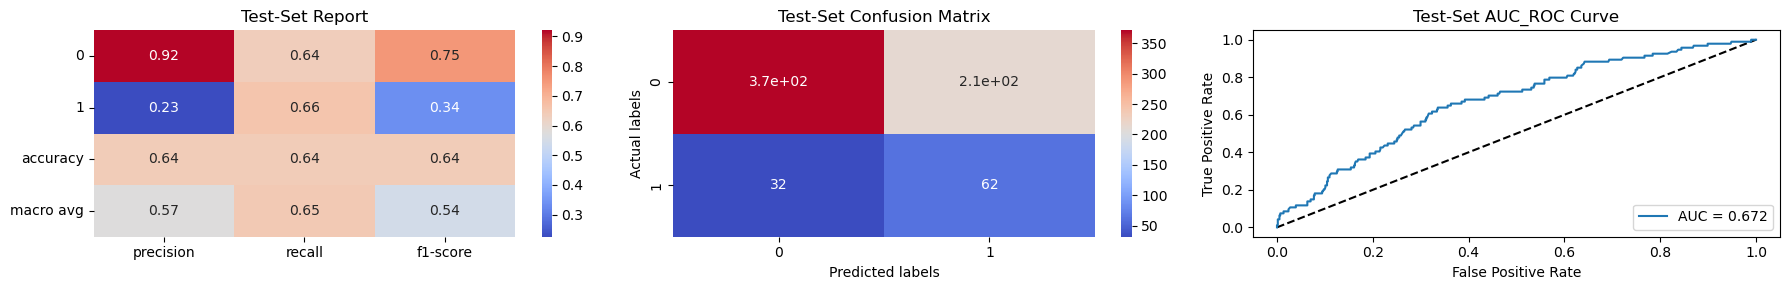

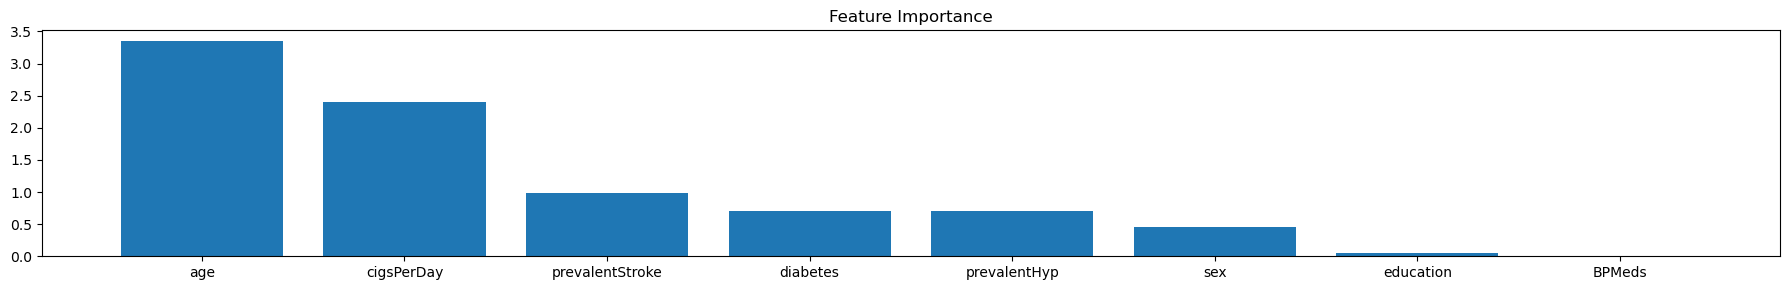

LogisticRegression(max_iter=10000)

In [75]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
evaluate_model(lr, x_smote, x_test, y_smote, y_test)

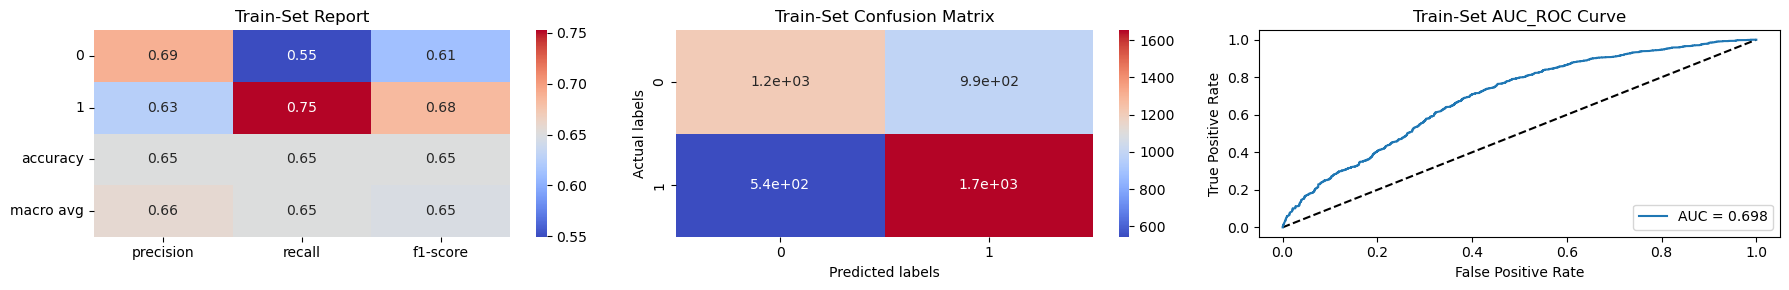

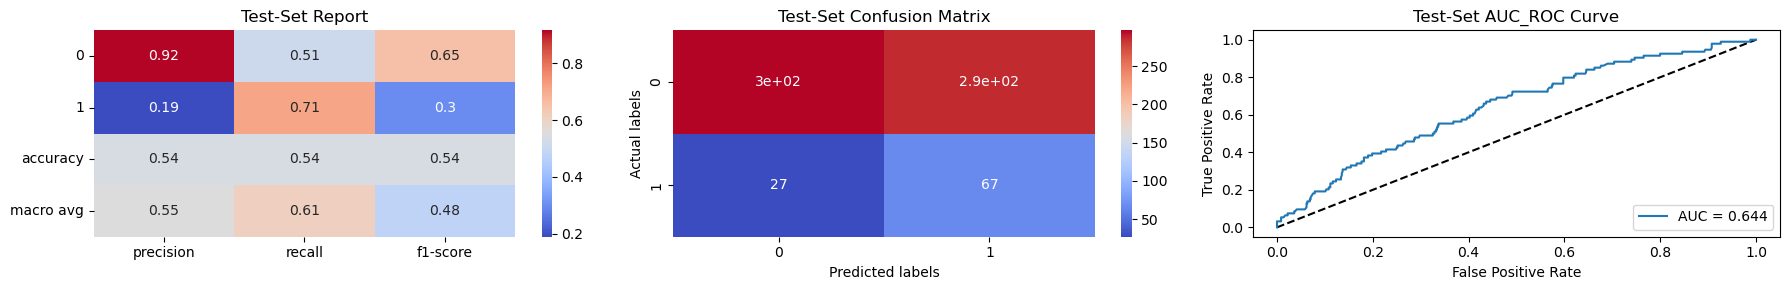

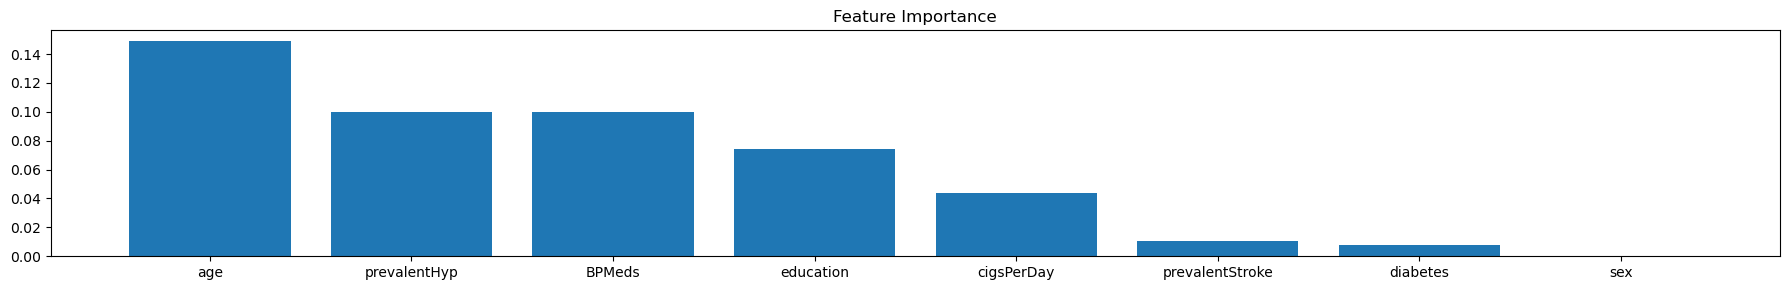

SVC(C=0.1, kernel='linear', max_iter=1000, probability=True, random_state=0)

In [77]:
# SVM algorithm
from sklearn.svm import SVC
clf = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
svc.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
evaluate_model(svc.best_estimator_, x_smote, x_test, y_smote, y_test)

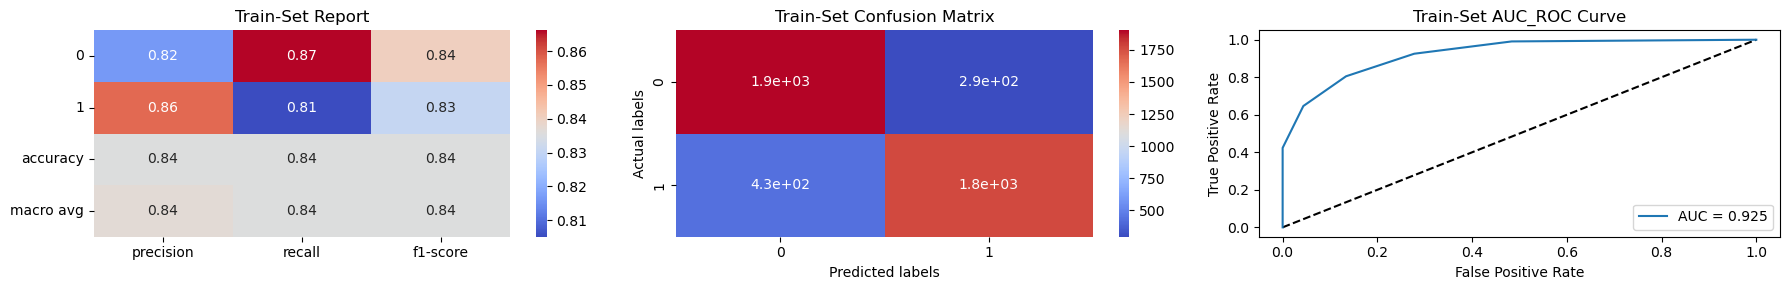

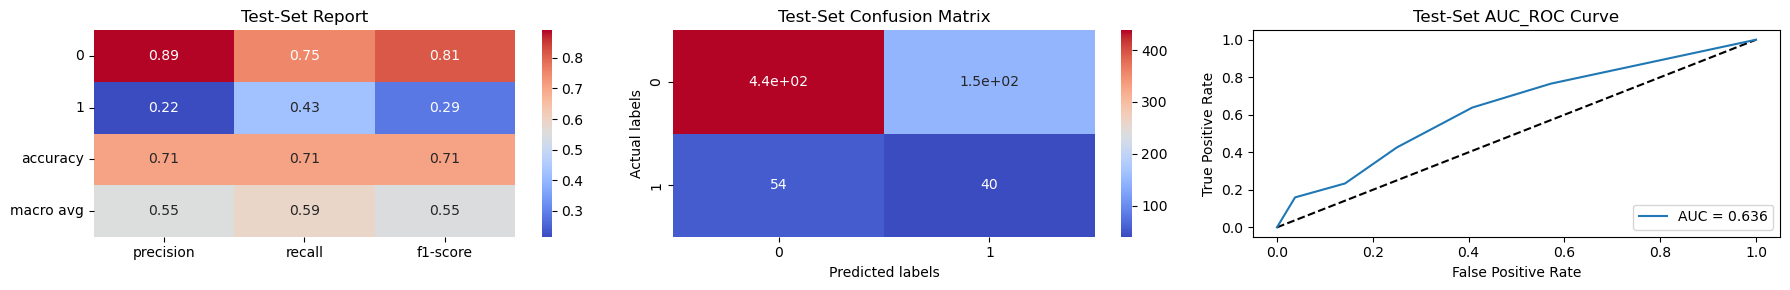

<Figure size 1800x300 with 0 Axes>

KNeighborsClassifier(metric='manhattan')

In [78]:
from sklearn.neighbors import KNeighborsClassifier
# Classifier
clf = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
knn.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, x_smote, x_test, y_smote, y_test)

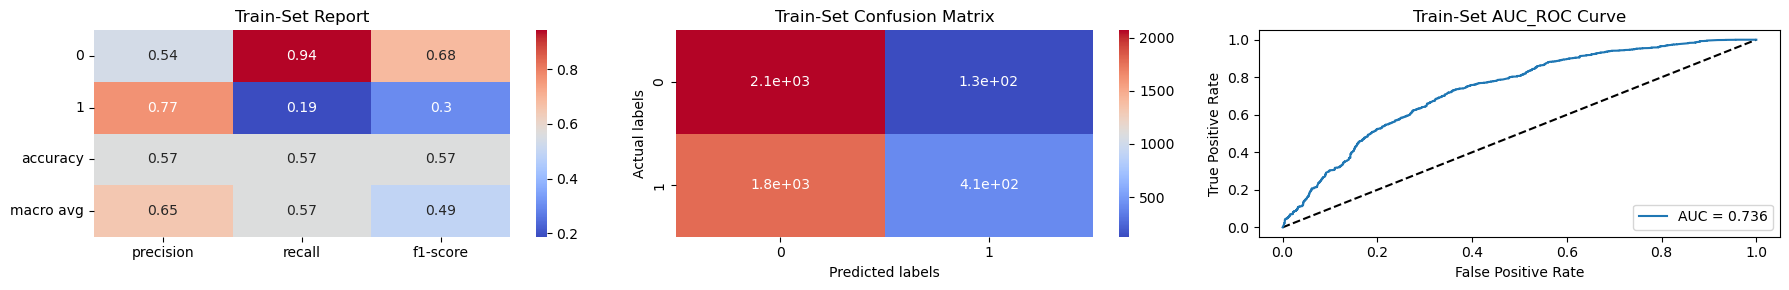

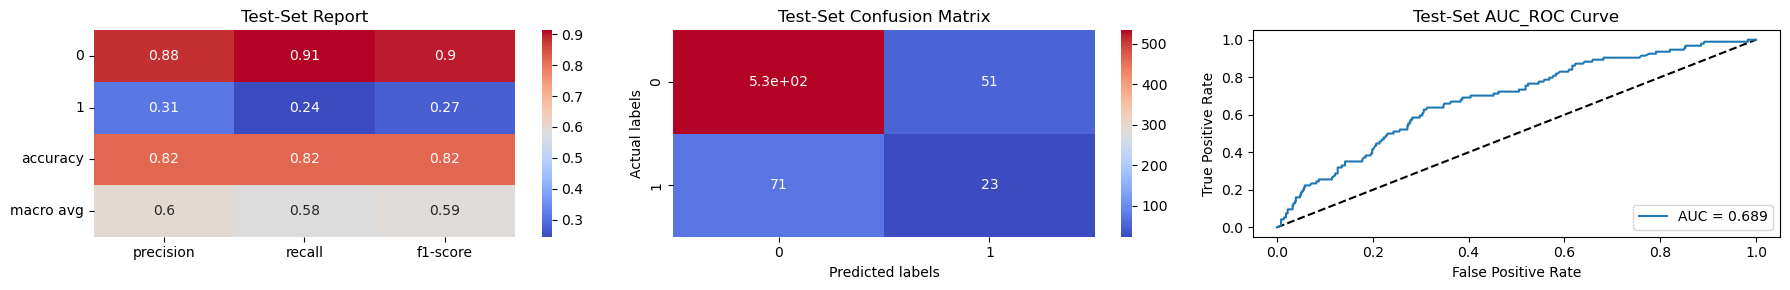

<Figure size 1800x300 with 0 Axes>

GaussianNB()

In [80]:
from sklearn.naive_bayes import GaussianNB
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, x_smote, x_test, y_smote, y_test)

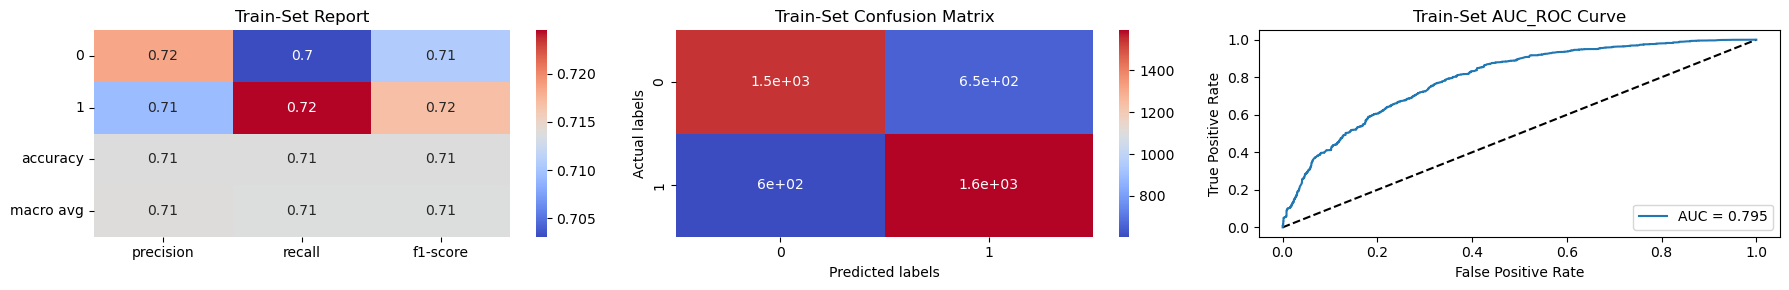

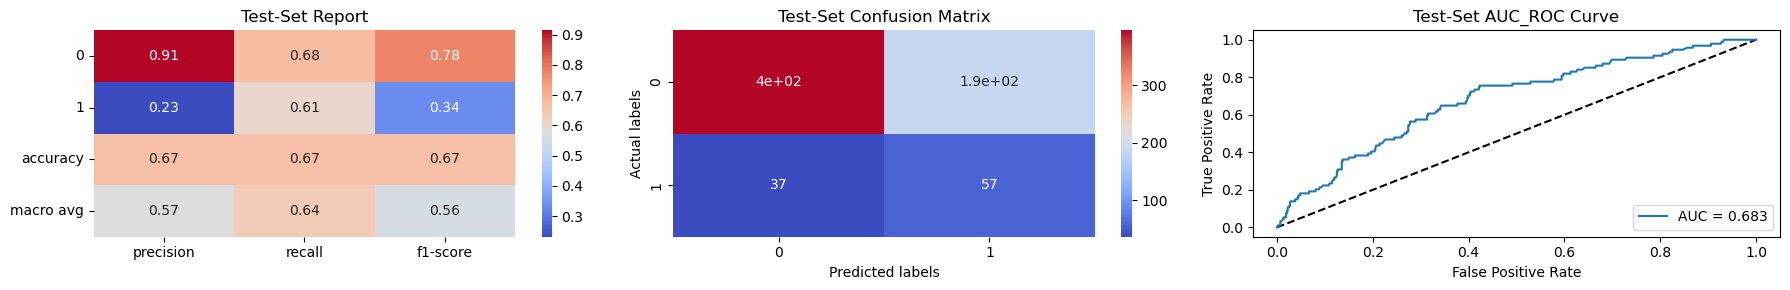

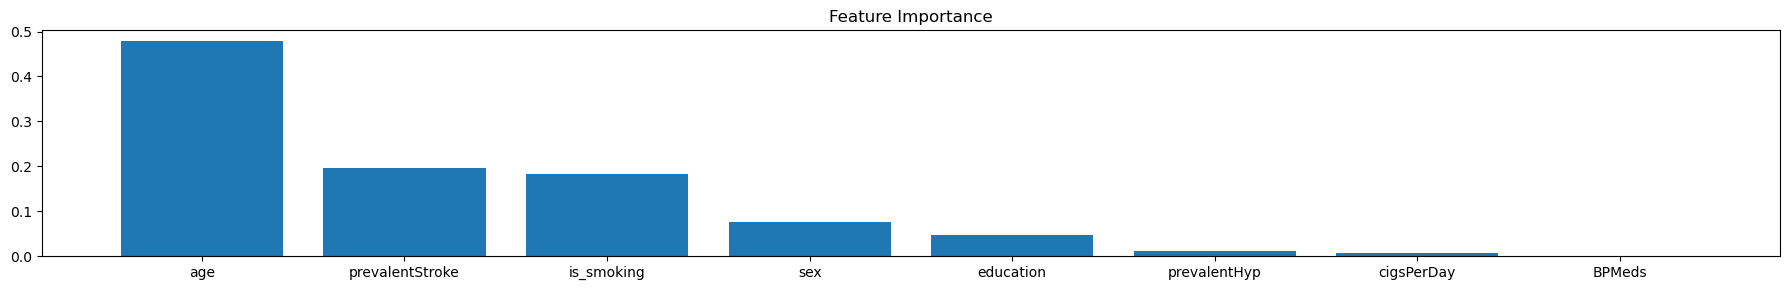

RandomForestClassifier(max_depth=6, min_samples_leaf=60, min_samples_split=50,
                       random_state=2)

In [86]:
from sklearn.ensemble import RandomForestClassifier
# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
evaluate_model(rf.best_estimator_, x_smote, x_test, y_smote, y_test)

In [90]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.7/99.7 MB 4.4 MB/s eta 0:00:00


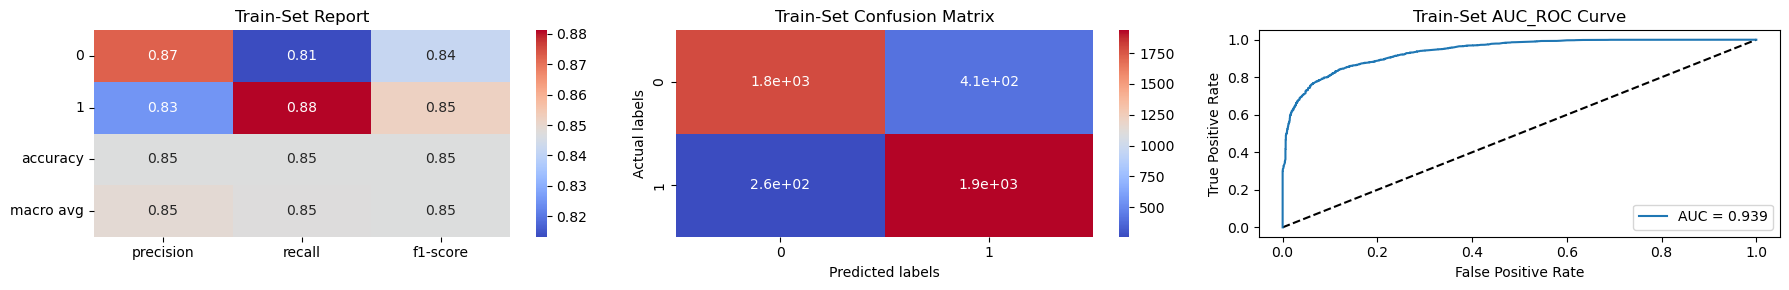

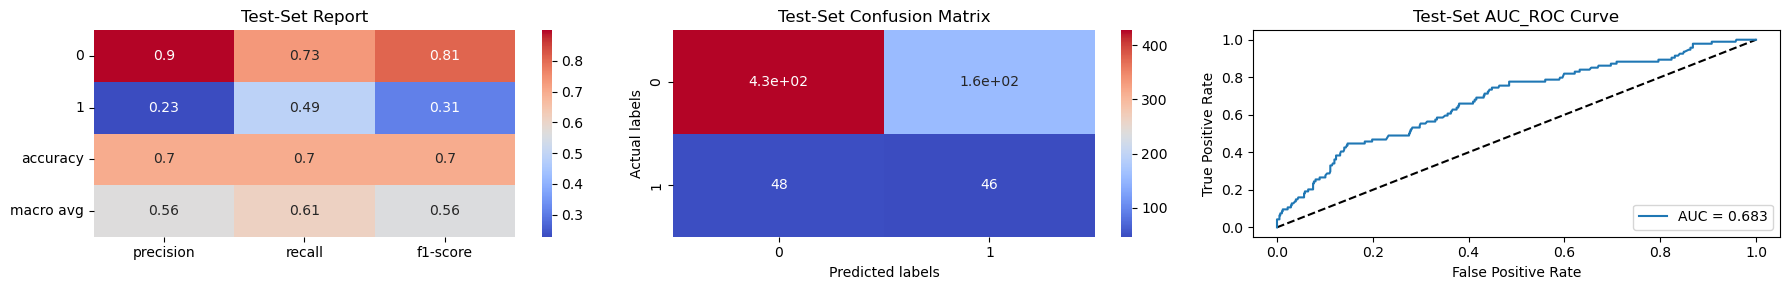

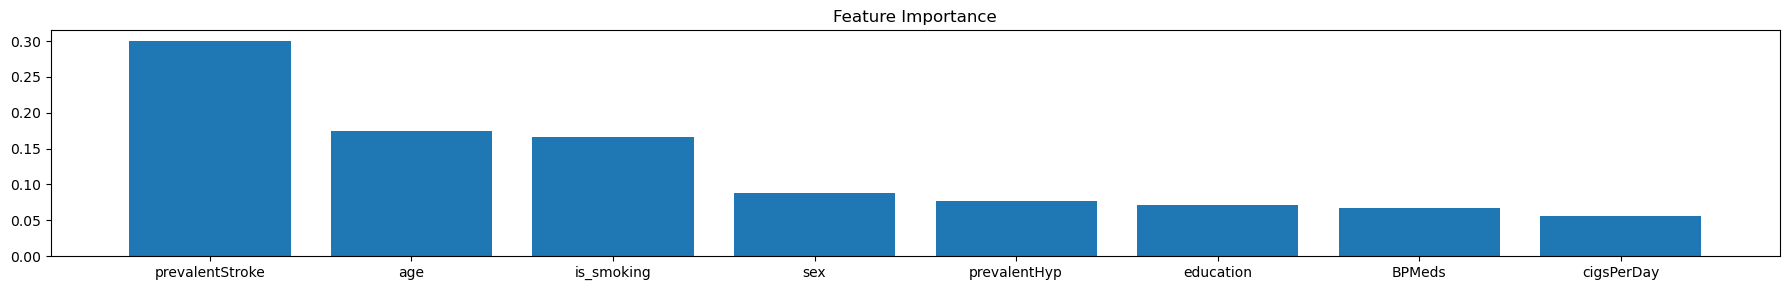

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.05,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, min_samples_leaf=30,
                min_samples_split=50, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, ...)

In [91]:
from xgboost import XGBRFClassifier
# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
evaluate_model(xgb.best_estimator_, x_smote, x_test, y_smote, y_test)

## Conclusion

1. If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.
2. Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.
3. Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.
4. Best performance of Models on test data based on evaluation metrics for class 1:
5. Recall - SVC
6. Precision - Naive Bayes Classifier
7. F1 Score - Logistic Regression, XGBoost
8. Accuracy - Naive Bayes Classifier